In [1]:
### User Interface

In [2]:
import pandas as pd

In [3]:
import geopandas as gpd

In [4]:
import numpy as np

In [5]:
from matplotlib import pyplot as plt

In [6]:
#line colors: obtenidos a partir del mapa
lc_A = (0,174,224)  #azul clarito
lc_B = (230,54,41) #rojo
lc_C = (18,102,175) #azul oscuro
lc_D = (2,122,97) #verde oscuro
lc_E = (124,38,129) #morado fuerte
lines_colors = [lc_A, lc_B, lc_C, lc_D, lc_E]
lines_l = ['A','B','C','D','E']
lines_names = ['LINEA '+l for l in lines_l]
dict_lines_colors = dict(zip(lines_names,lines_colors))
def f_lines_colors(color):
    return dict_lines_colors[color]
def f_lines_colors_RGB(line):
    color = f_lines_colors(line)
    return (color[0]/255,color[1]/255,color[2]/255)
#(0.5,0.07,1) -> #7f11ff
def convertir_a_hexadecimal(color):
    # Asegúrate de que los valores estén entre 0 y 1
    r, g, b = (max(0, min(1, c)) for c in color)
    
    # Convierte los valores a enteros de 0 a 255
    r_int = int(r * 255)
    g_int = int(g * 255)
    b_int = int(b * 255)
    
    # Devuelve el formato hexadecimal
    return f"#{r_int:02x}{g_int:02x}{b_int:02x}"

In [7]:
from shapely.ops import linemerge

In [8]:
lines_data = gpd.read_file('datasets/lineas-de-subte-zip/lineas-subte.shp')
lines_data = lines_data[np.isin(lines_data.LINEASUB, lines_names)].reset_index(drop=True).drop(columns=['ID'])
lines_data = lines_data.dissolve("LINEASUB").reset_index()
lines_data.loc[:,'geometry'] = [linemerge(line) for line in lines_data.geometry] #MULTILINESTRING, multiple LINESTRINGs to LINESTRING
lines_data.loc[:,'color'] = [convertir_a_hexadecimal(f_lines_colors_RGB(line)) for line in lines_data.LINEASUB]

In [9]:
lines_data

,LINEASUB,geometry,color
0,LINEA A,"LINESTRING (-58.37097 -34.60881, -58.37226 -34...",#00aee0
1,LINEA B,"LINESTRING (-58.36993 -34.60299, -58.37507 -34...",#e63629
2,LINEA C,"LINESTRING (-58.38143 -34.62762, -58.38146 -34...",#1266af
3,LINEA D,"MULTILINESTRING ((-58.46238 -34.55564, -58.459...",#027a61
4,LINEA E,"MULTILINESTRING ((-58.37368 -34.60924, -58.377...",#7c2681


In [10]:
from shapely import LineString

In [11]:
from matplotlib.patches import Circle

In [12]:
lines_names = lines_data.LINEASUB.unique()
custom_circles = [Circle((0,0), fc= f_lines_colors_RGB(line), ) for line in lines_names]
legend_params_list = [custom_circles, lines_names]

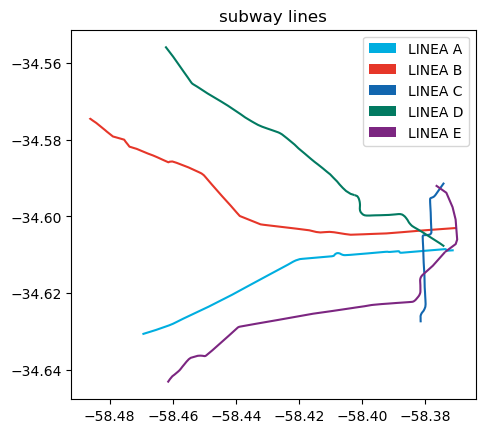

In [13]:
lines_data.plot(color = lines_data.color, )
plt.gca().legend(*legend_params_list)
plt.title('subway lines')
plt.show()

In [14]:
stations_data = gpd.read_file('datasets/estaciones-de-subte/estaciones-de-subte.shp')
stations_data = stations_data[np.isin(stations_data.LINEA, lines_l)].reset_index(drop=True).drop(columns=['ID'])
stations_data.loc[:,'LINEA'] = 'LINEA '+stations_data['LINEA']
stations_data.rename(columns={'LINEA':'LINEASUB'},inplace = True)
stations_data.loc[:,'color'] = [convertir_a_hexadecimal(f_lines_colors_RGB(line)) for line in stations_data.LINEASUB]

In [15]:
stations_data

,ESTACION,LINEASUB,geometry,color
0,9 DE JULIO,LINEA D,POINT (-58.38057 -34.60425),#027a61
1,FACULTAD DE MEDICINA,LINEA D,POINT (-58.39792 -34.59976),#027a61
2,TRIBUNALES - TEATRO COLÓN,LINEA D,POINT (-58.38514 -34.60159),#027a61
3,AGÜERO,LINEA D,POINT (-58.40716 -34.59163),#027a61
4,R.SCALABRINI ORTIZ,LINEA D,POINT (-58.41596 -34.58516),#027a61
...,...,...,...,...
73,SAN PEDRITO,LINEA A,POINT (-58.46964 -34.63071),#00aee0
74,SAN JOSÉ DE FLORES,LINEA A,POINT (-58.46354 -34.62909),#00aee0
75,RETIRO,LINEA E,POINT (-58.37585 -34.59211),#7c2681
76,CATALINAS,LINEA E,POINT (-58.37170 -34.59660),#7c2681


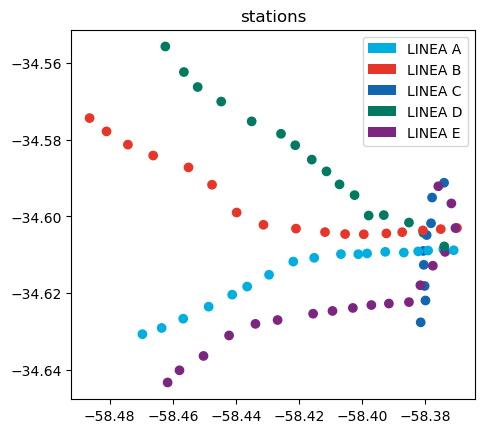

In [16]:
stations_data.plot(color = stations_data.color)
plt.gca().legend(*legend_params_list)
plt.title('stations')
plt.show()

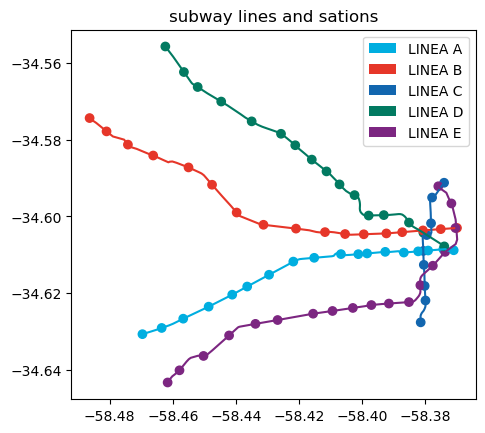

In [17]:
fig, ax = plt.subplots()
lines_data.plot(color = lines_data.color, ax = ax)
stations_data.plot(color = stations_data.color, ax = ax)
plt.gca().legend(*legend_params_list)
plt.title('subway lines and sations')
plt.show()

### Boundaries 

In [18]:
boundaries_margin = 0.0008
# station_colors_ = stations_colors
#the most bottom station:
bottom_sname = 'CONSTITUCION'
# print('bottom')
# display(stations_data[stations_data.ESTACION==bottom_sname])
bottom_y = stations_data[stations_data.ESTACION==bottom_sname].iloc[0,:]['geometry'].y  - boundaries_margin
#the rightest station:
right_sname = 'LEANDRO N. ALEM'
# print('right')
# display(stations_data[stations_data.ESTACION==right_sname])
right_x = stations_data[stations_data.ESTACION==right_sname].iloc[0,:]['geometry'].x + boundaries_margin
#the toppest station:
top_sname = 'RETIRO'
# print('top')
# display(stations_data[stations_data.ESTACION==top_sname])
top_y = stations_data[stations_data.ESTACION==top_sname].iloc[0,:]['geometry'].y  + boundaries_margin
#the leftest station:
left_sname = 'ALBERTI'
# print('left')
# display(stations_data[stations_data.ESTACION==left_sname])
left_x = stations_data[stations_data.ESTACION==left_sname].iloc[0,:]['geometry'].x - boundaries_margin

In [19]:
lines_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
stations_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
from shapely import Polygon

In [22]:
def rectangle_cords(x,X,y,Y):
    return ((x,y),(X,y),(X,Y),(x,Y),(x,y))

In [23]:
cords = rectangle_cords(left_x, right_x, bottom_y, top_y)
rosa = (255,64,255)
boundaries_color = np.array([rosa])/255
boundaries = gpd.GeoDataFrame(geometry = [Polygon(cords)], crs = 'EPSG:4326')

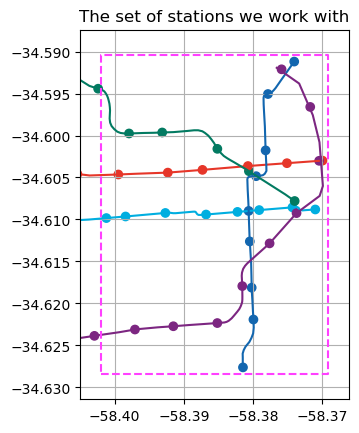

In [24]:
fig, ax = plt.subplots()
plot_margin = 0.003
y_lim = (bottom_y-plot_margin,top_y+plot_margin)
x_lim = (left_x-plot_margin, right_x+plot_margin)
plt.ylim(y_lim)
plt.xlim(x_lim)
lines_data.plot(color = lines_data.color, ax = ax)
stations_data.plot(color = stations_data.color, ax = ax)
boundaries.boundary.plot(color = boundaries_color, ls = '--', ax = ax)
plt.title('The set of stations we work with')
plt.grid(True)
# plt.savefig('stations_and_lines_set.png')
plt.show()

In [25]:
view_x_lim = x_lim
view_y_lim = y_lim
view_lim_cords = rectangle_cords(*(x_lim+y_lim))
view_lim = gpd.GeoDataFrame(geometry = [Polygon(view_lim_cords)], crs = 'EPSG:4326')

In [26]:
stations_data_set = stations_data[stations_data.geometry.within(boundaries.loc[0,'geometry'])]
to_remove = (stations_data_set.LINEASUB=='LINEA E')&(np.isin(stations_data_set.ESTACION, ['RETIRO', 'CATALINAS', 'CORREO CENTRAL']))
stations_data_set = stations_data_set[~to_remove]
lines_data_set = gpd.overlay(lines_data,view_lim, how = "intersection") #[lines_data.geometry.intersects(view_lim.geometry[0])]

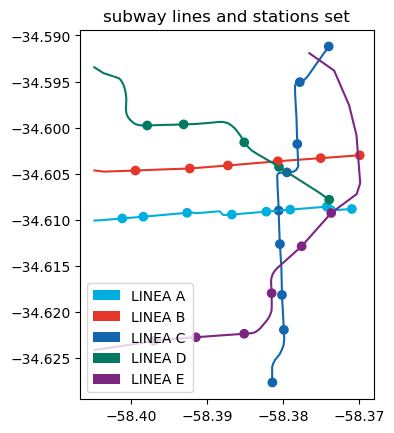

In [27]:
stations_data_set.plot(color =stations_data_set.color)
ax = plt.gca()
lines_data_set.plot(color =lines_data_set.color, ax = ax)
ax.legend(*legend_params_list)
plt.title('subway lines and stations set')
plt.show()

### Stations set 

In [28]:
stations_data_set[stations_data_set.ESTACION.duplicated(keep=False)]

,ESTACION,LINEASUB,geometry,color
12,INDEPENDENCIA,LINEA C,POINT (-58.38017 -34.61813),#1266af
40,INDEPENDENCIA,LINEA E,POINT (-58.38153 -34.61794),#7c2681


In [29]:
#'9 DE JULIO' -> '9 de Julio'
def formatear_estacion(texto):
    palabras = texto.split()
    palabras_formateadas = []

    for palabra in palabras:
        if palabra.lower() == 'de':  # Mantener 'de' en minúscula
            palabras_formateadas.append(palabra.lower())
        elif palabra.isnumeric():  # Mantener los números tal cual
            palabras_formateadas.append(palabra)
        else:  # Formatear las palabras
            palabras_formateadas.append(palabra.capitalize())

    return ' '.join(palabras_formateadas)
def formatear_estacion_linea(estacion,linea):
    e = estacion.replace('.','').replace(' ','_')
    #'LINEA A' -> 'A'
    l = linea.split(' ')[-1]
    return e+'_'+l

In [30]:
rename_dict = {'CONGRESO - PDTE. DR. RAÚL R. ALFONSÍN':'CONGRESO', 'CALLAO - MAESTRO ALFREDO BRAVO':'CALLAO','PASTEUR - AMIA':'PASTEUR',
              'TRIBUNALES - TEATRO COLÓN':'TRIBUNALES','ENTRE RIOS - RODOLFO WALSH':'ENTRE RIOS'}
stations_data_set = stations_data_set.replace(rename_dict)
stations_data_set.loc[:,'ESTACION'] = [formatear_estacion(e) for e in stations_data_set.ESTACION]
stations_data_set.loc[:,'est_lin'] = [formatear_estacion_linea(e,l) for e,l in zip(stations_data_set.ESTACION,stations_data_set.LINEASUB)]
stations_data_set = stations_data_set[['ESTACION', 'LINEASUB', 'est_lin', 'geometry', 'color']]

In [31]:
#ESTAN TODAS
stations_data_set.sort_values(["LINEASUB","ESTACION"])

,ESTACION,LINEASUB,est_lin,geometry,color
31,Alberti,LINEA A,Alberti_A,POINT (-58.40121 -34.60983),#00aee0
29,Congreso,LINEA A,Congreso_A,POINT (-58.39267 -34.60923),#00aee0
27,Lima,LINEA A,Lima_A,POINT (-58.38223 -34.60910),#00aee0
30,Pasco,LINEA A,Pasco_A,POINT (-58.39843 -34.60965),#00aee0
25,Peru,LINEA A,Peru_A,POINT (-58.37427 -34.60856),#00aee0
26,Piedras,LINEA A,Piedras_A,POINT (-58.37909 -34.60888),#00aee0
64,Plaza de Mayo,LINEA A,Plaza_de_Mayo_A,POINT (-58.37097 -34.60881),#00aee0
28,Saenz Peña,LINEA A,Saenz_Peña_A,POINT (-58.38678 -34.60941),#00aee0
15,C. Pellegrini,LINEA B,C_Pellegrini_B,POINT (-58.38071 -34.60364),#e63629
17,Callao,LINEA B,Callao_B,POINT (-58.39231 -34.60442),#e63629


## Lines set 

### La línea E ha sido ampliada a partir de bolívar 

In [32]:
linea_e = lines_data_set[lines_data_set.LINEASUB =='LINEA E'].geometry.iloc[0]

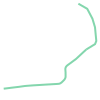

In [33]:
linea_e

In [34]:
type(linea_e)

shapely.geometry.multilinestring.MultiLineString

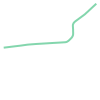

(-58.405007534233, -34.62411858091603, -58.37368422404687, -34.609242429760634)

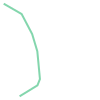

(-58.37666988372803,
 -34.609245904016454,
 -58.36986780166625,
 -34.59186603162806)

In [35]:
for g in linea_e.geoms:
    display(g)
    display(g.bounds)

In [36]:
bolivar = stations_data_set[stations_data_set.ESTACION=='Bolivar'].geometry.iloc[0]

In [37]:
bolivar.xy

(array('d', [-58.373684224168464]), array('d', [-34.60924242886078]))

In [38]:
i = lines_data_set[lines_data_set.LINEASUB=="LINEA E"].index[0]
lines_data_set.loc[i,'geometry'] = lines_data_set.loc[i,'geometry'].geoms[0]

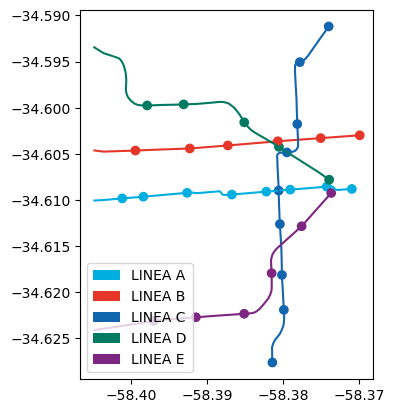

In [39]:
stations_data_set.plot(color =stations_data_set.color)
ax = plt.gca()
lines_data_set.plot(color =lines_data_set.color, ax = ax)
ax.legend(*legend_params_list)
plt.show()

In [40]:
lines_data_set

,LINEASUB,color,geometry
0,LINEA A,#00aee0,"LINESTRING (-58.37097 -34.60881, -58.37226 -34..."
1,LINEA B,#e63629,"LINESTRING (-58.36993 -34.60299, -58.37507 -34..."
2,LINEA C,#1266af,"LINESTRING (-58.38143 -34.62762, -58.38146 -34..."
3,LINEA D,#027a61,"MULTILINESTRING ((-58.40501 -34.59339, -58.403..."
4,LINEA E,#7c2681,"LINESTRING (-58.37368 -34.60924, -58.37758 -34..."


<Axes: >

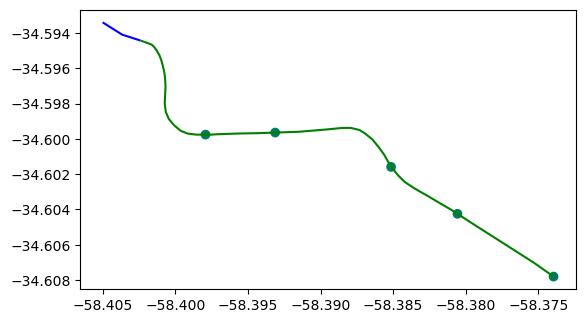

In [41]:
i_list = lines_data_set[lines_data_set.LINEASUB=="LINEA D"].index 
linea_d = lines_data_set.loc[i_list,:].explode(index_parts = False)
linea_d.plot(color = ['blue','green'])
ax = plt.gca()
stations_data_set[stations_data_set.LINEASUB=="LINEA D"].plot(color = stations_data_set[stations_data_set.LINEASUB=="LINEA D"].color, ax = ax)

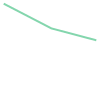

(-58.405007534233, -34.594425718479954, -58.40239534364797, -34.59339331048243)

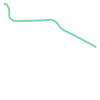

(-58.40239534364797,
 -34.60780233672652,
 -58.37395580610297,
 -34.59442571847996)

In [42]:
for geom in lines_data_set.loc[3,'geometry'].geoms:
    display(geom)
    display(geom.bounds)

[(-58.405007534233, -34.59339331048243),
 (-58.403661600411375, -34.59409048160747),
 (-58.40239534364797, -34.594425718479954)]

[(-58.405007534233, -34.59339331048243),
 (-58.403661600411375, -34.59409048160747),
 (-58.40239534364797, -34.59442571847996)]

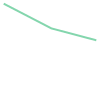

In [43]:
coords = list(lines_data_set.loc[3,'geometry'].geoms[0].coords)
display(coords)
coords_end = coords[-1]
coords[-1] = (coords_end[0],-34.59442571847996)
display(coords)
new_line = LineString(coords)
display(new_line)

<Axes: >

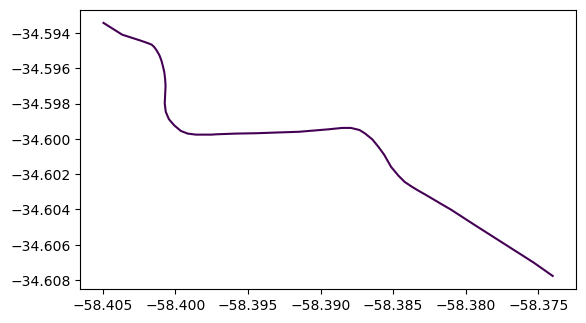

In [44]:
new_line_d_geom = linemerge([lines_data_set.loc[3,'geometry'].geoms[1],new_line])
new_line_d = gpd.GeoDataFrame(geometry = [new_line_d_geom], crs = lines_data_set.crs)
new_line_d.plot(column = new_line_d.index.to_numpy())

In [45]:
i = lines_data_set[lines_data_set.LINEASUB=="LINEA D"].index[0]
lines_data_set.loc[i,'geometry'] = new_line_d_geom

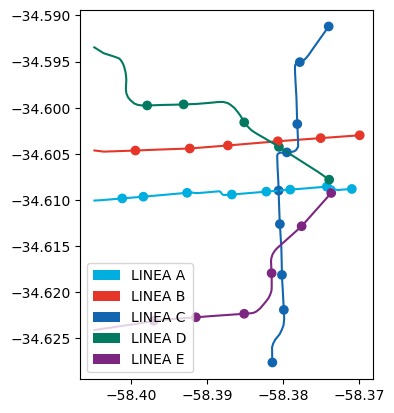

In [46]:
stations_data_set.plot(color =stations_data_set.color)
ax = plt.gca()
lines_data_set.plot(color =lines_data_set.color, ax = ax)
ax.legend(*legend_params_list)
plt.show()

In [47]:
lines_data_set

,LINEASUB,color,geometry
0,LINEA A,#00aee0,"LINESTRING (-58.37097 -34.60881, -58.37226 -34..."
1,LINEA B,#e63629,"LINESTRING (-58.36993 -34.60299, -58.37507 -34..."
2,LINEA C,#1266af,"LINESTRING (-58.38143 -34.62762, -58.38146 -34..."
3,LINEA D,#027a61,"LINESTRING (-58.40501 -34.59339, -58.40366 -34..."
4,LINEA E,#7c2681,"LINESTRING (-58.37368 -34.60924, -58.37758 -34..."


### Dividir la línea en tramos de estación a estación 

In [48]:
cut_dict = {'LINEA D':'vertical', 'LINEA C':'horizontal','LINEA A':'vertical', 'LINEA E':'horizontal', 'LINEA B':'vertical'}
def cut_lines_gdf(sd,line):
    margin = 0.001
    if cut_dict[line] == 'horizontal':
        x = sd.geometry.x.min() - margin
        X = sd.geometry.x.max() + margin
        geoms = [LineString([[x,g.y],[X,g.y]]) for g in sd.geometry]
    elif cut_dict[line] == 'vertical':
        y = sd.geometry.y.min() - margin
        Y = sd.geometry.y.max() + margin
        geoms = [LineString([[g.x,y],[g.x,Y]]) for g in sd.geometry]
    return gpd.GeoDataFrame(sd.est_lin.to_numpy(), columns = ["est_lin"], geometry = geoms, crs = sd.crs)

In [49]:
def cut_lines_bounds_polygon(cut_lines):
    bounds = cut_lines.geometry.bounds
    x = bounds.minx.min()
    X = bounds.maxx.max()
    y = bounds.miny.min()
    Y = bounds.maxy.max()
    return Polygon(rectangle_cords(x,X,y,Y))

,LINEASUB,color,geometry
0,LINEA A,#00aee0,"LINESTRING (-58.37097 -34.60881, -58.37226 -34..."


,LINEASUB,est_lin_o,est_lin_d,geometry,color
0,LINEA A,null,Alberti_A,"LINESTRING (-58.37097 -34.60881, -58.37226 -34...",#00aee0
1,LINEA A,Alberti_A,Pasco_A,"LINESTRING (-58.37427 -34.60856, -58.37427 -34...",#00aee0
2,LINEA A,Pasco_A,Congreso_A,"LINESTRING (-58.37909 -34.60888, -58.38223 -34...",#00aee0
3,LINEA A,Congreso_A,Saenz_Peña_A,"LINESTRING (-58.38223 -34.60910, -58.38223 -34...",#00aee0
4,LINEA A,Saenz_Peña_A,Lima_A,"LINESTRING (-58.38678 -34.60941, -58.38678 -34...",#00aee0
5,LINEA A,Lima_A,Piedras_A,"LINESTRING (-58.39267 -34.60923, -58.39843 -34...",#00aee0
6,LINEA A,Piedras_A,Peru_A,"LINESTRING (-58.39843 -34.60965, -58.39843 -34...",#00aee0
7,LINEA A,Peru_A,Plaza_de_Mayo_A,"LINESTRING (-58.40121 -34.60983, -58.40376 -34...",#00aee0


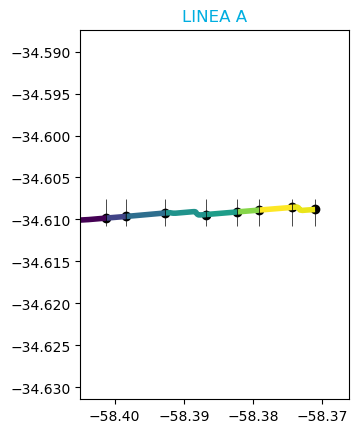

,LINEASUB,color,geometry
1,LINEA B,#e63629,"LINESTRING (-58.36993 -34.60299, -58.37507 -34..."


,LINEASUB,est_lin_o,est_lin_d,geometry,color
0,LINEA B,null,Pasteur_B,"LINESTRING (-58.36993 -34.60299, -58.37507 -34...",#e63629
1,LINEA B,Pasteur_B,Callao_B,"LINESTRING (-58.37507 -34.60330, -58.37507 -34...",#e63629
2,LINEA B,Callao_B,Uruguay_B,"LINESTRING (-58.38071 -34.60364, -58.38071 -34...",#e63629
3,LINEA B,Uruguay_B,C_Pellegrini_B,"LINESTRING (-58.38730 -34.60409, -58.38730 -34...",#e63629
4,LINEA B,C_Pellegrini_B,Florida_B,"LINESTRING (-58.39231 -34.60442, -58.39231 -34...",#e63629
5,LINEA B,Florida_B,Leandro_N_Alem_B,"LINESTRING (-58.39947 -34.60464, -58.39947 -34...",#e63629


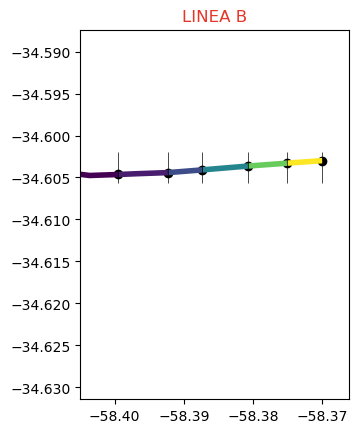

,LINEASUB,color,geometry
2,LINEA C,#1266af,"LINESTRING (-58.38143 -34.62762, -58.38146 -34..."


,LINEASUB,est_lin_o,est_lin_d,geometry,color
0,LINEA C,Constitucion_C,San_Juan_C,"LINESTRING (-58.38143 -34.62762, -58.38146 -34...",#1266af
1,LINEA C,San_Juan_C,Independencia_C,"LINESTRING (-58.37992 -34.62192, -58.37999 -34...",#1266af
2,LINEA C,Independencia_C,Moreno_C,"LINESTRING (-58.38017 -34.61813, -58.38017 -34...",#1266af
3,LINEA C,Moreno_C,Av_de_Mayo_C,"LINESTRING (-58.38044 -34.61262, -58.38048 -34...",#1266af
4,LINEA C,Av_de_Mayo_C,Diagonal_Norte_C,"LINESTRING (-58.38061 -34.60898, -58.38063 -34...",#1266af
5,LINEA C,Diagonal_Norte_C,Lavalle_C,"LINESTRING (-58.37953 -34.60484, -58.37923 -34...",#1266af
6,LINEA C,Lavalle_C,San_Martin_C,"LINESTRING (-58.37816 -34.60177, -58.37817 -34...",#1266af
7,LINEA C,San_Martin_C,Retiro_C,"LINESTRING (-58.37782 -34.59506, -58.37775 -34...",#1266af


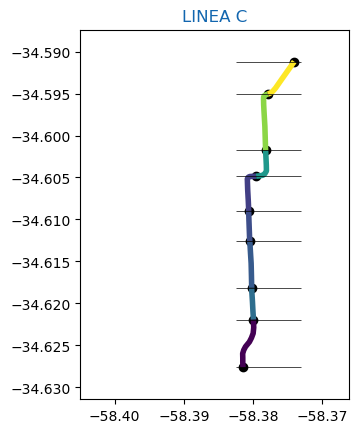

,LINEASUB,color,geometry
3,LINEA D,#027a61,"LINESTRING (-58.40501 -34.59339, -58.40366 -34..."


,LINEASUB,est_lin_o,est_lin_d,geometry,color
0,LINEA D,null,Facultad_de_Medicina_D,"LINESTRING (-58.40501 -34.59339, -58.40366 -34...",#027a61
1,LINEA D,Facultad_de_Medicina_D,Callao_D,"LINESTRING (-58.39792 -34.59976, -58.39752 -34...",#027a61
2,LINEA D,Callao_D,Tribunales_D,"LINESTRING (-58.39313 -34.59964, -58.39300 -34...",#027a61
3,LINEA D,Tribunales_D,9_de_Julio_D,"LINESTRING (-58.38514 -34.60159, -58.38464 -34...",#027a61
4,LINEA D,9_de_Julio_D,Catedral_D,"LINESTRING (-58.38057 -34.60425, -58.37945 -34...",#027a61
5,LINEA D,Catedral_D,null,"LINESTRING (-58.37396 -34.60780, -58.37396 -34...",#027a61


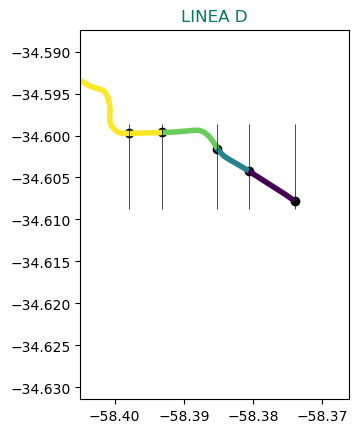

,LINEASUB,color,geometry
4,LINEA E,#7c2681,"LINESTRING (-58.37368 -34.60924, -58.37758 -34..."


,LINEASUB,est_lin_o,est_lin_d,geometry,color
0,LINEA E,null,Pichincha_E,"LINESTRING (-58.37368 -34.60924, -58.37758 -34...",#7c2681
1,LINEA E,Pichincha_E,Entre_Rios_E,"LINESTRING (-58.37758 -34.61285, -58.37758 -34...",#7c2681
2,LINEA E,Entre_Rios_E,San_Jose_E,"LINESTRING (-58.38153 -34.61794, -58.38153 -34...",#7c2681
3,LINEA E,San_Jose_E,Independencia_E,"LINESTRING (-58.38515 -34.62234, -58.38515 -34...",#7c2681
4,LINEA E,Independencia_E,Belgrano_E,"LINESTRING (-58.39151 -34.62272, -58.39151 -34...",#7c2681
5,LINEA E,Belgrano_E,Bolivar_E,"LINESTRING (-58.39707 -34.62311, -58.39707 -34...",#7c2681


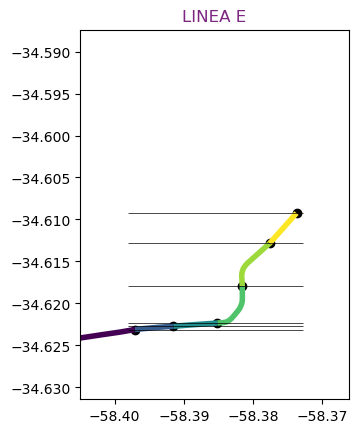

In [53]:
lineas_tramos = pd.DataFrame()
for line in lines_names:
    line_data = lines_data_set[lines_data_set.LINEASUB==line]
    station_data = stations_data_set[stations_data_set.LINEASUB==line].reset_index(drop = True)
    cut_lines = cut_lines_gdf(station_data,line).sort_values("geometry")
    station_data = station_data.loc[cut_lines.index,:]
    cut_lines_stations = cut_lines.est_lin.to_numpy()
    cutted = gpd.overlay(line_data,cut_lines, how = "difference").explode(index_parts = False).reset_index(drop=True)
    cut_lines_poly = cut_lines_bounds_polygon(cut_lines)
    contained = cut_lines_bounds_polygon(cut_lines).contains(cutted.geometry)
    if not contained.loc[len(contained)-1]:
        estaciones_origen = np.concatenate([['null'],cut_lines_stations[:-1]])
        estaciones_destino = cut_lines_stations[:]
    else:
        estaciones_origen = cut_lines_stations[:-1]
        estaciones_destino = cut_lines_stations[1:]
    if not contained.loc[0]:
        estaciones_destino = np.concatenate([estaciones_destino,['null']])
        estaciones_origen = np.concatenate([estaciones_origen,[cut_lines_stations[-1]]])
    cutted.loc[:,'est_lin_o'] = estaciones_origen
    cutted.loc[:,'est_lin_d'] = estaciones_destino
    cutted = cutted[['LINEASUB','est_lin_o','est_lin_d','geometry','color']]
    column = cutted.geometry.bounds.minx if cut_dict[line] == 'horizontal' else cutted.geometry.bounds.miny 
    display(line_data)
    display(cutted)
    cutted.plot(column = column, cmap = "viridis",linewidths=4)
    ax = plt.gca()
    station_data.plot(color = "black", ax = plt.gca())
    cut_lines.plot(color = 'black', lw = 0.5, ax = plt.gca())
    # c = f_lines_colors_RGB(line)
    # line_data.plot(color = c)
    # ax = plt.gca()
    # station_data.plot(color = c, ax = ax)
    plt.title(line, fontdict = {'color':f_lines_colors_RGB(line)})
    plt.ylim(view_y_lim)
    plt.xlim(view_x_lim)
    plt.show()
    lineas_tramos = pd.concat([lineas_tramos, cutted])
lineas_tramos = gpd.GeoDataFrame(lineas_tramos, crs = cutted.crs).reset_index(drop=True)
    

In [51]:
# [id_tramo, peso , izq, der]

In [52]:
lineas_tramos

,LINEASUB,est_lin_o,est_lin_d,geometry,color
0,LINEA A,null,Alberti_A,"LINESTRING (-58.37097 -34.60881, -58.37226 -34...",#00aee0
1,LINEA A,Alberti_A,Pasco_A,"LINESTRING (-58.37427 -34.60856, -58.37427 -34...",#00aee0
2,LINEA A,Pasco_A,Congreso_A,"LINESTRING (-58.37909 -34.60888, -58.38223 -34...",#00aee0
3,LINEA A,Congreso_A,Saenz_Peña_A,"LINESTRING (-58.38223 -34.60910, -58.38223 -34...",#00aee0
4,LINEA A,Saenz_Peña_A,Lima_A,"LINESTRING (-58.38678 -34.60941, -58.38678 -34...",#00aee0
5,LINEA A,Lima_A,Piedras_A,"LINESTRING (-58.39267 -34.60923, -58.39843 -34...",#00aee0
6,LINEA A,Piedras_A,Peru_A,"LINESTRING (-58.39843 -34.60965, -58.39843 -34...",#00aee0
7,LINEA A,Peru_A,Plaza_de_Mayo_A,"LINESTRING (-58.40121 -34.60983, -58.40376 -34...",#00aee0
8,LINEA B,null,Pasteur_B,"LINESTRING (-58.36993 -34.60299, -58.37507 -34...",#e63629
9,LINEA B,Pasteur_B,Callao_B,"LINESTRING (-58.37507 -34.60330, -58.37507 -34...",#e63629


In [54]:
lineas_tramos.to_file('./generated_datasets/lineas_tramos/lineas_tramos.shp')
stations_data_set.to_file('./generated_datasets/stations/stations_dataset.shp')